In [6]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import networkx as nx
import itertools

In [71]:
names_control = ["right-center", "center", "left", "left-center", "right"]
names = ["Alt-right", "IDW", "Alt-lite", "control"]
names_list_list = [["Alt-right"], ["IDW"], ["Alt-lite"], names_control]
x_label = ["2016", "2017", "2018"]
bins_like_name = ["0", "1", "2-5", "6-100", "100"]
lines = ['-', '--', '-.', ':', '-', '-.', ':']
df_path = "./../data/sentiment/dataframes/"
img_path = "./../imgs/"

# TextBlob

In [21]:
blob_df_path = df_path + "text_blob_df/time/"
pol = []
subj = []
for name in names:
    pol.append(pd.read_csv(f"{blob_df_path}{name}_pol.csv"))
    subj.append(pd.read_csv(f"{blob_df_path}{name}_subj.csv"))

In [22]:
pol[0]

Unnamed: 0          x         y       dyd       dyu       std
0           0  2006-2012  0.107797  0.103917  0.111546  0.277619
1           1  2013-2015  0.123599  0.121788  0.125479  0.300081
2           2       2016  0.077790  0.076557  0.079018  0.307476
3           3       2017  0.067450  0.066751  0.068133  0.298892
4           4       2018  0.054567  0.054074  0.055039  0.297678

### Mean

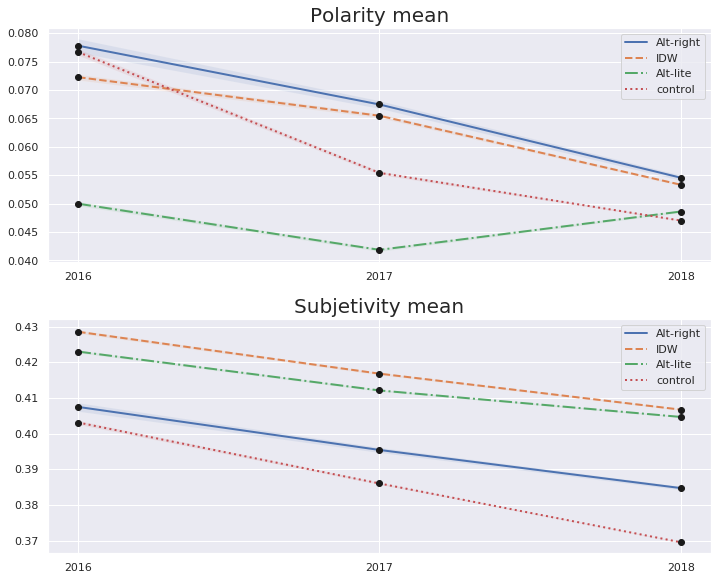

In [33]:
fig, ax = plt.subplots(2, 1, figsize=[10, 5],  squeeze=False)
fig.tight_layout()
plt.subplots_adjust(bottom=-0.5)
ax[0, 0].set_title("Polarity mean", fontsize=20)
#ax[0, 0].set_ylim([0.,0.25])
for i in range(len(pol)):
    ax[0, 0].plot(pol[i].x[2:], pol[i].y[2:], lines[i], linewidth=2)
ax[0, 0].legend(names)
for i in range(len(pol)):
    ax[0, 0].plot(pol[i].x[2:], pol[i].y[2:], 'ok')
    ax[0, 0].fill_between(pol[i].x[2:], pol[i]["dyd"][2:], pol[i]["dyu"][2:], alpha=0.1)

ax[1, 0].set_title("Subjetivity mean", fontsize=20)
#ax[1, 0].set_ylim([0.36,0.48])
for i in range(len(subj)):
    ax[1, 0].plot(subj[i].x[2:], subj[i].y[2:], lines[i], linewidth=2)
ax[1, 0].legend(names)
for i in range(len(subj)):
    ax[1, 0].plot(subj[i].x[2:], subj[i].y[2:], 'ok')
    ax[1, 0].fill_between(subj[i].x[2:], subj[i]["dyd"][2:], subj[i]["dyu"][2:], alpha=0.1)
plt.savefig(f"{img_path}textblob/time/blob_mean.png", bbox_inches = 'tight')

### Standard Deviation

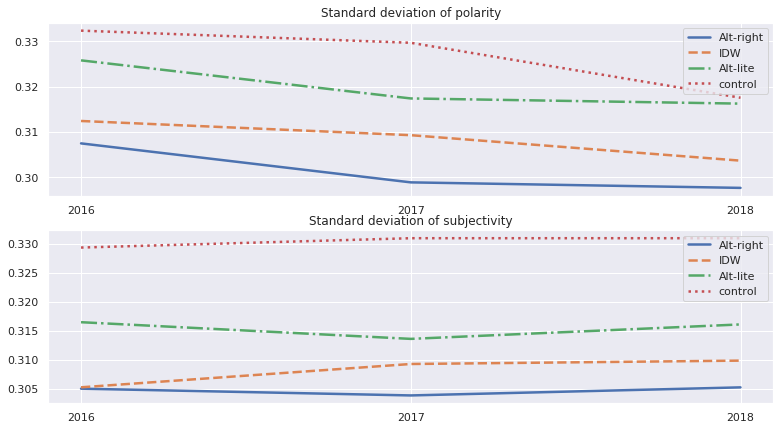

In [34]:
fig = plt.figure(figsize=[13, 7])
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

for i in range(len(pol)):
    ax1.plot(pol[i].x[2:], pol[i]["std"][2:], lines[i], linewidth=2.5)
ax1.set_title("Standard deviation of polarity")
ax1.legend(names);
for i in range(len(subj)):
    ax2.plot(subj[i].x[2:], subj[i]["std"][2:], lines[i], linewidth=2.5)
ax2.set_title("Standard deviation of subjectivity")
ax2.legend(names);
plt.savefig(f"{img_path}textblob/time/blob_standard_deviation.png")

### Polarity mean with standard deviation

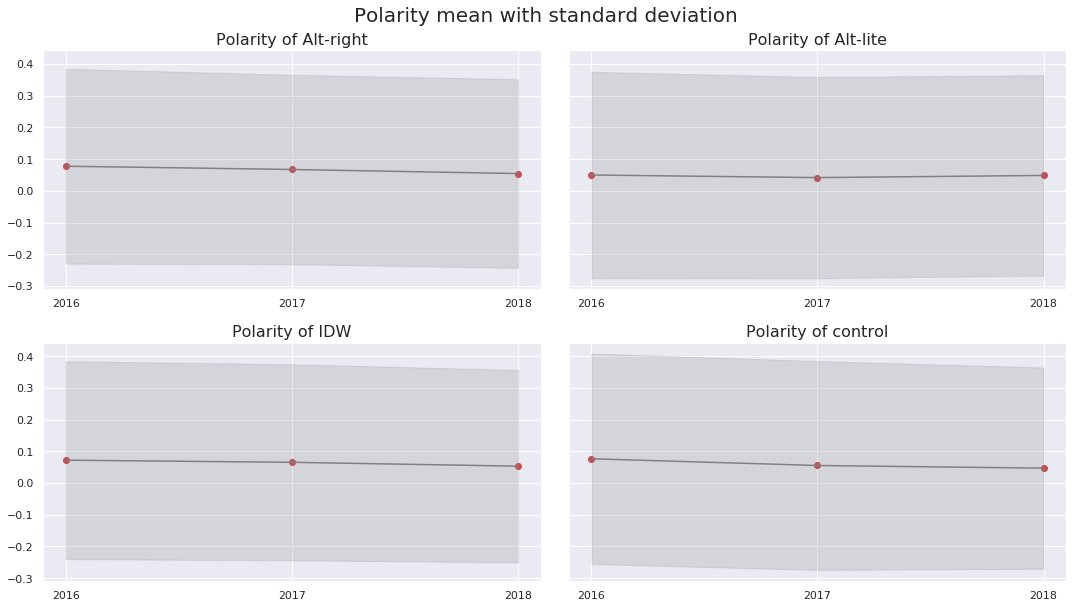

In [11]:
fig, ax = plt.subplots(2, 2, figsize=[15, 8],  squeeze=False, sharey=True)
plt.tight_layout(h_pad=3)
space = ' '
plt.suptitle(f"Polarity mean with standard deviation", fontsize=20, y=1.05)
for i in range(len(pol)):
    ax[i%2, i//2].set_title(f"Polarity of {names[i]}", fontsize=16)
    ax[i%2, i//2].plot(pol[i].x[2:], pol[i].y[2:], 'or')
    ax[i%2, i//2].plot(pol[i].x[2:], pol[i].y[2:], '-', color='gray')

    ax[i%2, i//2].fill_between(pol[i].x[2:], pol[i].y[2:]-pol[i]["std"][2:], pol[i].y[2:]+pol[i]["std"][2:],
                     color='gray', alpha=0.2)
#plt.savefig(f"{img_path}textblob/time/polarity_mean_and_std.png", bbox_inches = 'tight')

### Subjectivity mean with standard deviation

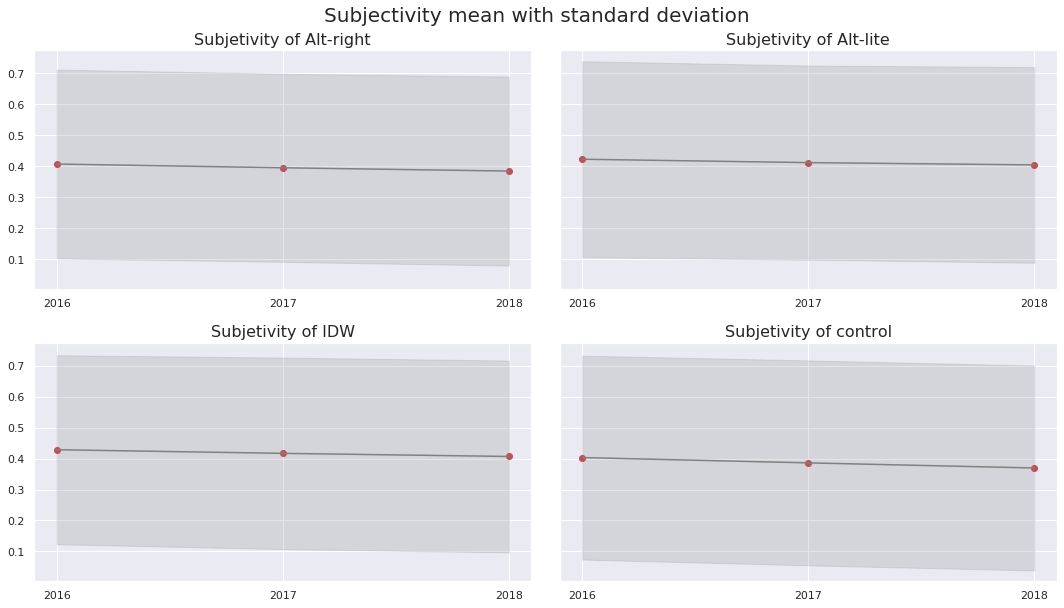

In [12]:
fig, ax = plt.subplots(2, 2, figsize=[15, 8],  squeeze=False, sharey=True)
plt.tight_layout(h_pad=3)
space = ' '
plt.suptitle(f"Subjectivity mean with standard deviation", fontsize=20, y=1.05)
for i in range(len(subj)):
    ax[i%2, i//2].set_title(f"Subjetivity of {names[i]}", fontsize=16)
    ax[i%2, i//2].plot(subj[i].x[2:], subj[i].y[2:], 'or')
    ax[i%2, i//2].plot(subj[i].x[2:], subj[i].y[2:], '-', color='gray')

    ax[i%2, i//2].fill_between(subj[i].x[2:], subj[i].y[2:]-subj[i]["std"][2:], subj[i].y[2:]+subj[i]["std"][2:],
                     color='gray', alpha=0.2)
#plt.savefig(f"{img_path}textblob/time/subjectivity_mean_and_std.png", bbox_inches = 'tight')

### Proportion

In [36]:
pol = []
subj = []
blob_prop_df_path = df_path + "text_blob_proportion_df/time/"
for name in names:
    pol.append(pd.read_csv(f"{blob_prop_df_path}{name}_pol_prop.csv"))
    subj.append(pd.read_csv(f"{blob_prop_df_path}{name}_subj_prop.csv"))
x=[i for i in range(2007, 2020)]

FileNotFoundError: [Errno 2] File b'./../data/sentiment/dataframes/text_blob_proportion_df/time/Alt-right_pol_prop.csv' does not exist: b'./../data/sentiment/dataframes/text_blob_proportion_df/time/Alt-right_pol_prop.csv'

### Polarity Proportion

NameError: name 'x' is not defined

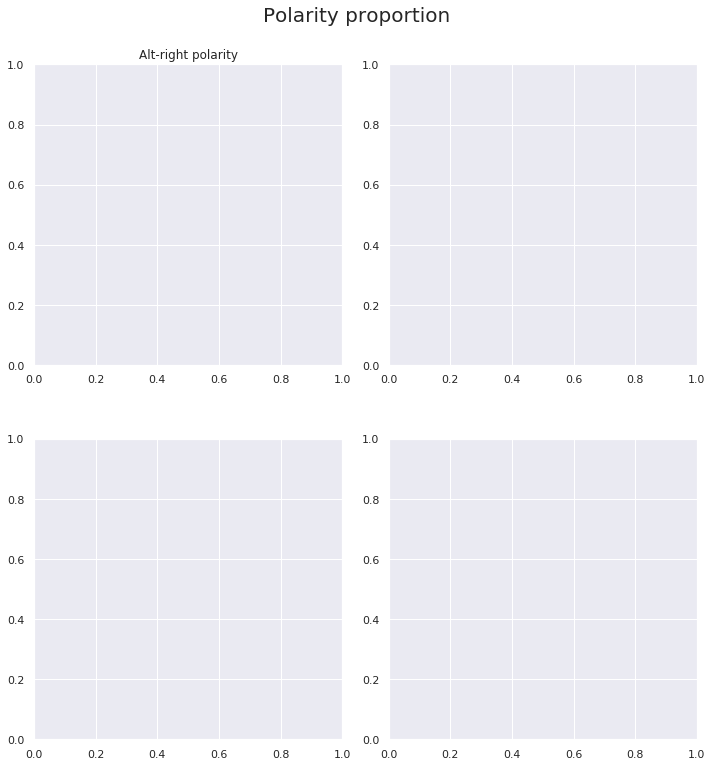

In [35]:
fig, ax = plt.subplots(2, 2, figsize=[10, 10],  squeeze=False)
plt.tight_layout(h_pad=5.0)
plt.suptitle("Polarity proportion", fontsize=20, y=1.06)
for i in range(len(pol)):
    ax[i//2, i%2].set_title((f"{names[i]} polarity"))
    df=pd.DataFrame({"year":x[9:], 'negative':pol[i]["neg"][9:], 'neutral':pol[i]["neu"][9:], 'positive':pol[i]["pos"][9:]})
    df.plot(x="year", kind='bar', stacked=True, ax=ax[i//2, i%2])
#plt.savefig("{imgs_path}textblob/polarity_proportion_bar.png", bbox_inches = 'tight')

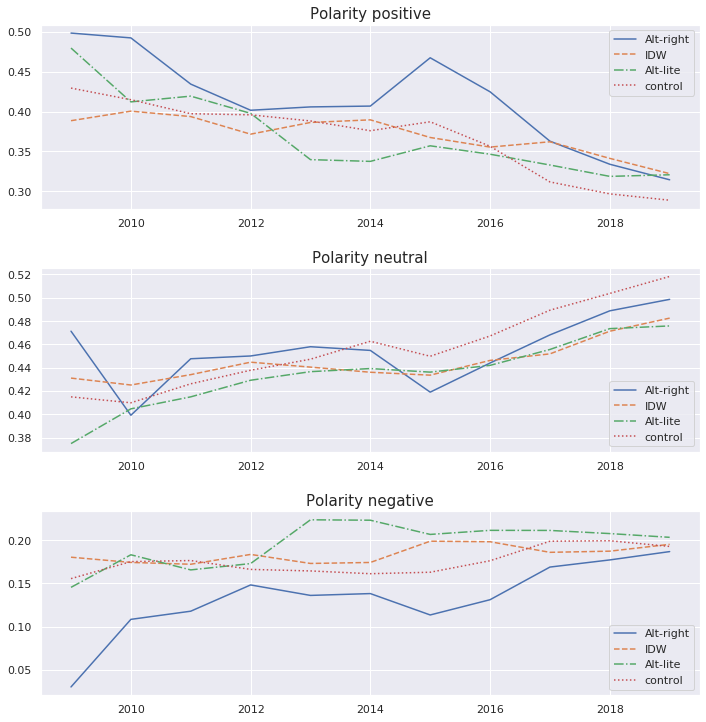

In [22]:
fig, ax = plt.subplots(3, 1, figsize=[10, 10],  squeeze=False)
plt.tight_layout(h_pad=3.0)

ax[0, 0].set_title("Polarity positive", fontsize=15)
for i in range(len(pol)):
    ax[0, 0].plot(pol[i]["x"][2:], pol[i]["pos"][2:], lines[i])
ax[0, 0].legend(names);

ax[1, 0].set_title("Polarity neutral", fontsize=15)
for i in range(len(pol)):
    ax[1, 0].plot(pol[i]["x"][2:], pol[i]["neu"][2:], lines[i])
ax[1, 0].legend(names)

ax[2, 0].set_title("Polarity negative", fontsize=15)
for i in range(len(pol)):
    ax[2, 0].plot(pol[i]["x"][2:], pol[i]["neg"][2:], lines[i])
ax[2, 0].legend(names);
#plt.savefig("{imgs_path}textblob/polarity_proportion_lines.png", bbox_inches = 'tight')

### Subjectivity Proportion

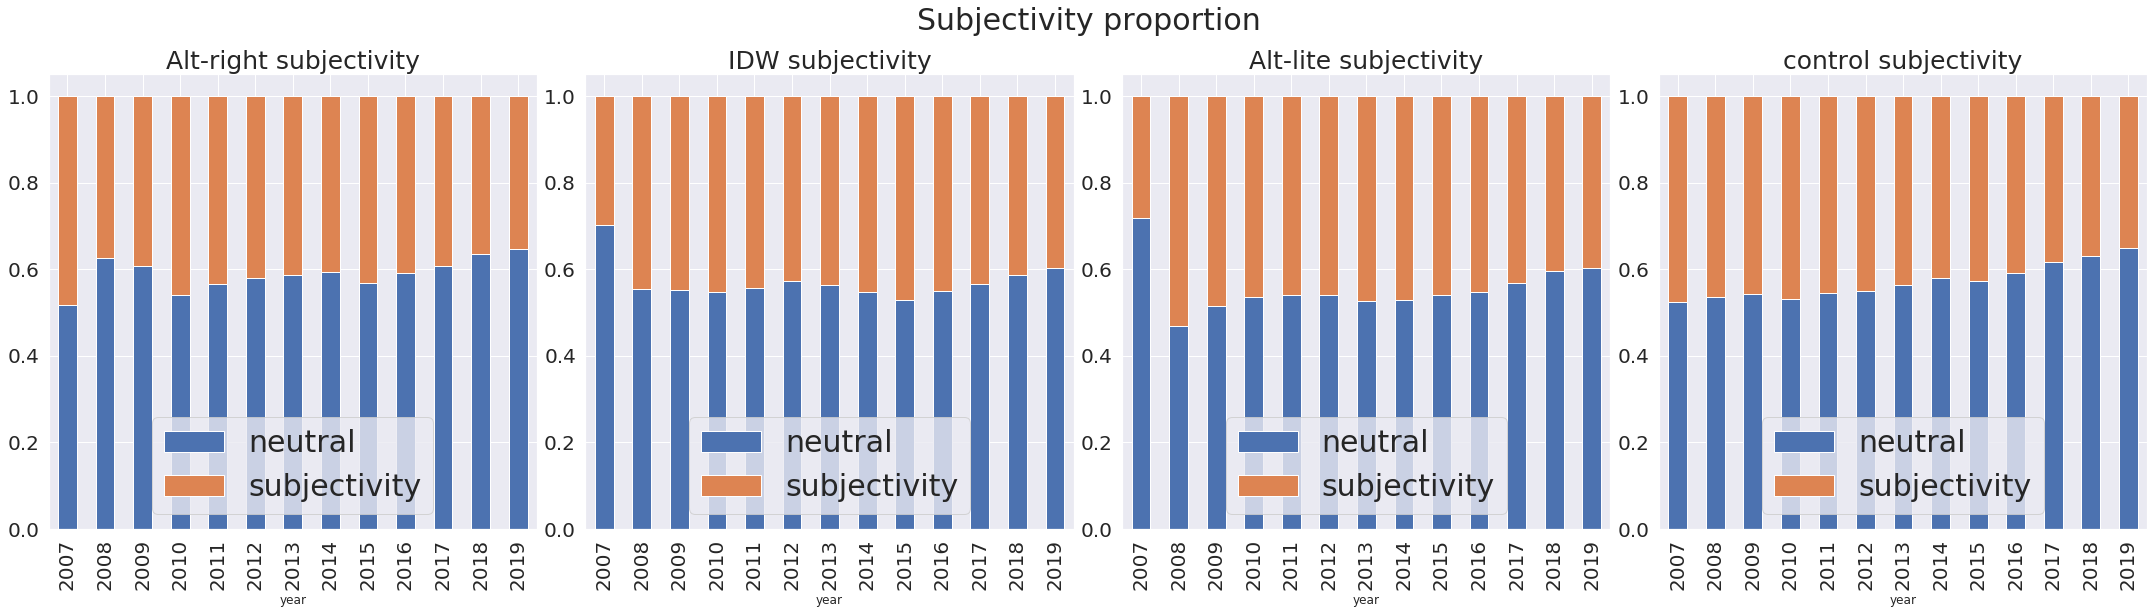

In [24]:
fig, ax = plt.subplots(1, 4, figsize=[30, 7],  squeeze=False)
plt.tight_layout(h_pad=5.0)
plt.suptitle("Subjectivity proportion", fontsize=30, y=1.1)
for i in range(len(subj)):
    ax[i//4, i%4].set_title((f"{names[i]} subjectivity"), size=25)
    ax[i//4, i%4].tick_params(axis='both', labelsize=20)

    df=pd.DataFrame({"year":x, 'neutral':subj[i]["neu"], 'subjectivity':subj[i]["pos"]})
    df.plot(x="year", kind='bar', stacked=True, ax=ax[i//4, i%4])
    ax[i//4, i%4].legend(prop={'size': 30})
#plt.savefig("{imgs_path}textblob/subjectivity_proportion_bars.png", bbox_inches = 'tight')

# Empath

In [55]:
emotion_list = ['love', 'ridicule', 'masculine', 'feminine',
                'violence','anger','politics', 'terrorism','hate']
empath = []
empath_df_path = df_path + "empath_df/"
for name in names:
    empath.append(pd.read_csv(f"{empath_df_path}{name}_empath_new.csv"))

In [19]:
empath_df_path

'./../data/sentiment/dataframes/empath_df/'

### Mean

In [9]:
bins_t_s = ["2016", "2017", "2018"]


In [28]:
t = []
for name in names:
    d = pd.read_csv(f"{empath_df_path}{name}_empath_new.csv")
    d_arr = np.array(d)
    y_real = []
    deno = 0
    for i in range(len(bins_t_s)):
        year = bins_t_s[i]
        with open(f"./../data/sentiment/values_per_year/empath/Alt-right_empath_{year}", "rb") as fp:
            a = pickle.load(fp)
        size = len(a)
        d = pd.read_csv(f"{empath_df_path}{name}_empath_new.csv")
        deno += size
        if(len(y_real) == 0):
            y_real = size*np.array(d_arr[i][1:-1])
        else:
            y_real += size*np.array(d_arr[i][1:-1])
    print(y_real/deno)
    t.append(y_real/deno)

[3.24384690e+01 3.25589124e+01 3.23174985e+01 1.20739748e-03
 1.23135726e-03 1.18462819e-03 9.92555961e-04 1.01239366e-03
 9.74530684e-04 6.97757367e-03 7.03327944e-03 6.92077798e-03
 2.62286825e-03 2.65713689e-03 2.59148992e-03 1.08047476e-02
 1.08741489e-02 1.07373483e-02 2.93283109e-03 2.96273914e-03
 2.90124817e-03 2.82909615e-03 2.86873125e-03 2.79254976e-03
 1.64231938e-03 1.67262410e-03 1.61075852e-03 3.05323524e-03
 3.09379456e-03 3.01567611e-03 2.34014591e-03 2.37545854e-03
 2.30606681e-03 3.67319733e-03 3.70910698e-03 3.63537230e-03
 2.24101177e-03 2.27214654e-03 2.21190199e-03 2.47054759e-03
 2.49741396e-03 2.44292958e-03 5.27985216e-04 5.42168159e-04
 5.14109250e-04 1.08331696e-03 1.10449363e-03 1.06210706e-03
 1.98287803e-03 2.01146554e-03 1.95391724e-03 1.85591666e-03
 1.88090335e-03 1.83189502e-03 1.18132087e-03 1.20330759e-03
 1.16048094e-03 2.05311222e-03 2.08265644e-03 2.02451812e-03
 1.61351338e-03 1.63792455e-03 1.59045918e-03 3.70665736e-03
 3.74828174e-03 3.665642

In [50]:
d = {}
for emotion in emotion_list[1:]:
    d[emotion] = []

In [51]:
for j in range(len(names)):
    for i in range(1, 22):
        a = t[j][3*i+1]
        d[emotion_list[i]].append(a)

In [52]:
d["name"] = names

In [53]:
df = pd.DataFrame(d)

In [54]:
df

sadness  independence  positive_emotion    family  negative_emotion  \
0  0.001231      0.001012          0.007033  0.002657          0.010874   
1  0.001077      0.000890          0.006765  0.002446          0.011714   
2  0.001064      0.000925          0.006954  0.002686          0.012376   
3  0.001208      0.000457          0.007084  0.002600          0.010761   

   government      love  ridicule  masculine  feminine  ...   dispute  \
0    0.002963  0.002869  0.001673   0.003094  0.002375  ...  0.002497   
1    0.002583  0.003040  0.002016   0.004029  0.001758  ...  0.003163   
2    0.002581  0.003127  0.002282   0.003591  0.002357  ...  0.002543   
3    0.003389  0.002876  0.001889   0.002595  0.001936  ...  0.002131   

      anger      envy      work  politics  terrorism     shame  confusion  \
0  0.000542  0.001104  0.002011  0.001881   0.001203  0.002083   0.001638   
1  0.000499  0.000966  0.002292  0.001948   0.000885  0.002013   0.001749   
2  0.000471  0.001015  0.002141  0.001905   0.000893  0.002137   0.001696   
3  0.000490  0.000813  0.002713  0.002223   0.001392  0.002264   0.001804   

       hate       name  
0  0.003748  Alt-right  
1  0.003571        IDW  
2  0.003935   Alt-lite  
3  0.003442    control  

[4 rows x 22 columns]

In [59]:
df.to_csv(f'{empath_df_path}mean_all_years.csv')

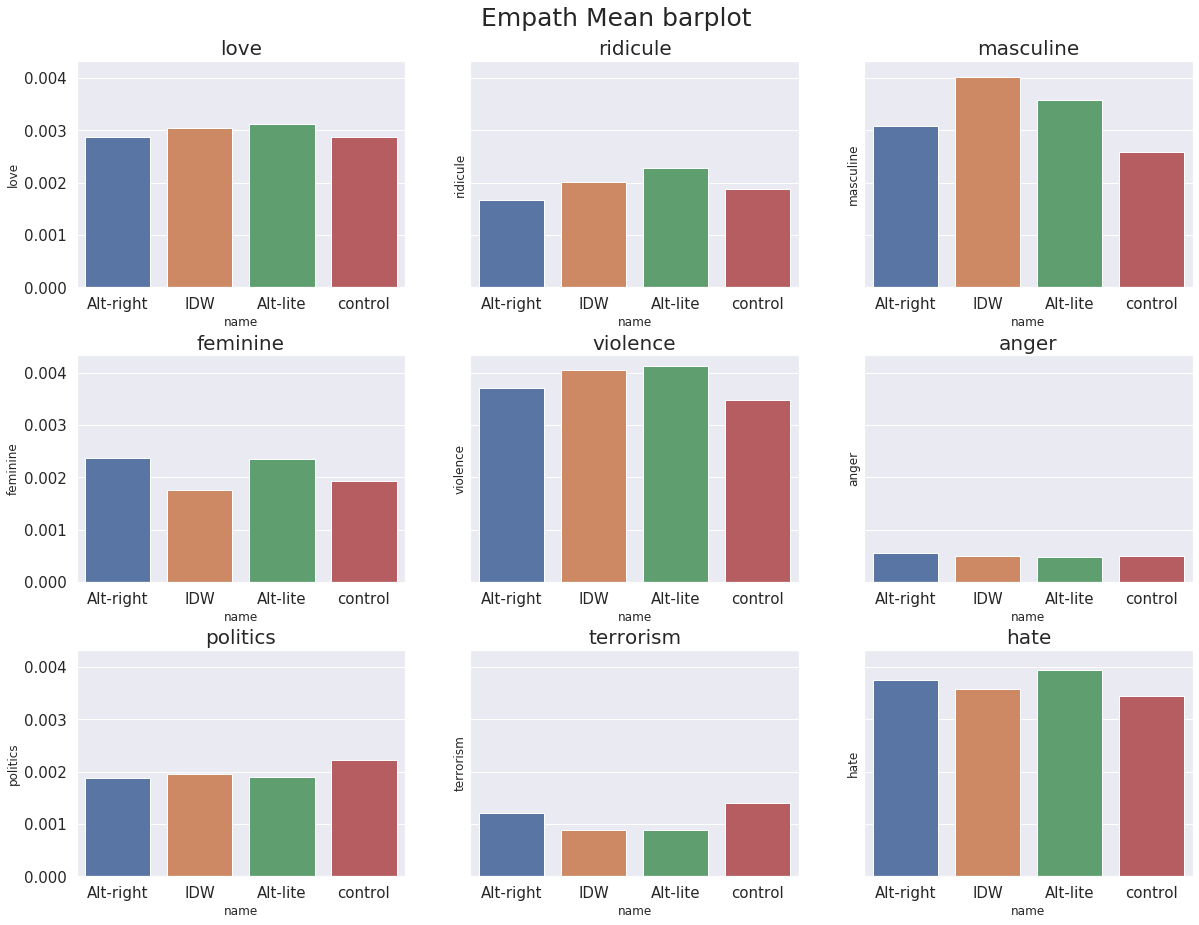

In [58]:
fig, ax = plt.subplots(3, 3, figsize=[20, 15],  squeeze=False, sharey=True)
plt.suptitle("Empath Mean barplot", fontsize=25, y=.93)
plt.subplots_adjust(hspace=0.3)

c=0
for emotion in emotion_list:
    ax[c//3, c%3].set_title(emotion, fontsize=20)
    sns.barplot(x="name", y=emotion, data=df, ax=ax[c//3, c%3])
    ax[c//3, c%3].tick_params(axis='both', labelsize=15)
    c+=1
plt.savefig(f"{img_path}empath/time/empath_barplot.png", bbox_inches = 'tight')

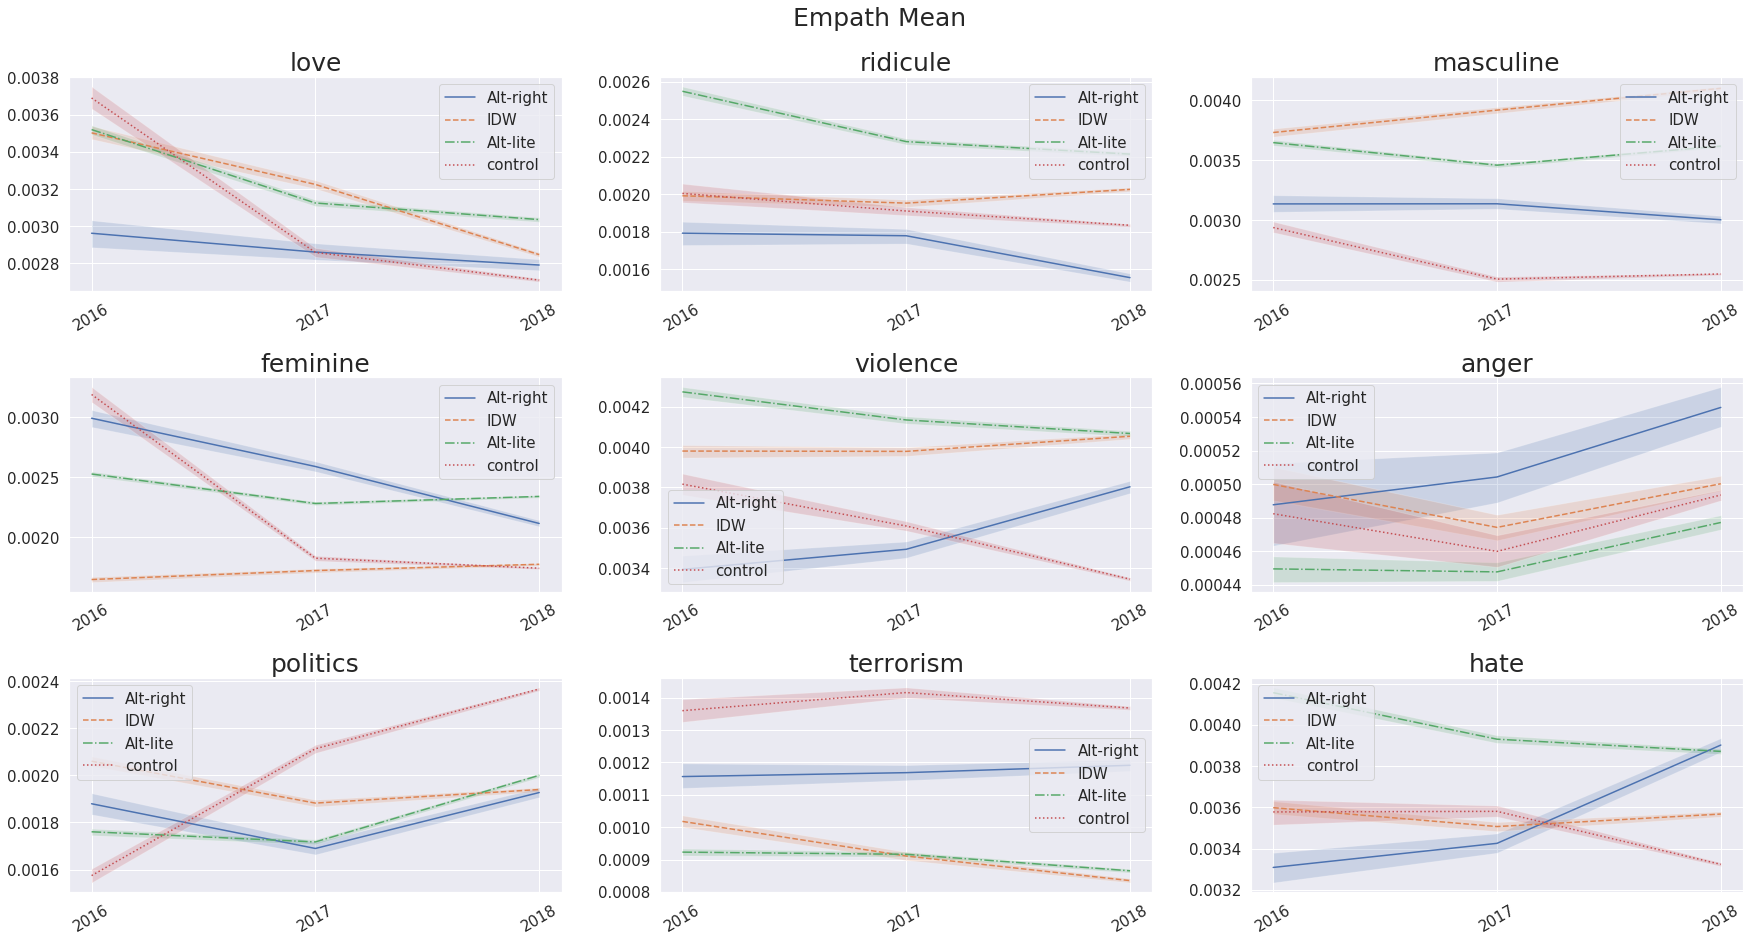

In [27]:
fig, ax = plt.subplots(3, 3, figsize=[30, 15],  squeeze=False)
c=0
plt.suptitle("Empath Mean", fontsize=25, y=.945)
plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.2)

for emotion in emotion_list:
    ax[c//3, c%3].set_title(emotion, fontsize=25)
    for i in range(len(names)):
        ax[c//3, c%3].plot(bins_t_s, empath[i][emotion], lines[i])
        ax[c//3, c%3].fill_between(bins_t_s, empath[i][f"{emotion}_dyd"],
                           empath[i][f"{emotion}_dyu"], alpha=0.2)   
    ax[c//3, c%3].legend(names, fontsize=15)
    ax[c//3, c%3].tick_params(axis='both', labelsize=15)
    ax[c//3, c%3].tick_params(axis='x', rotation=30)
    c+=1
plt.savefig(f"{img_path}empath/time/empath_mean.png", bbox_inches = 'tight')

# Polarity with Empath

In [20]:
y = []
emp_pol_df_path = df_path + "empath_blob_df/time/"
for name in names:
    y.append(pd.read_csv(f"{emp_pol_df_path}{name}_pol_empath_prop_boots.csv"))

### Mean

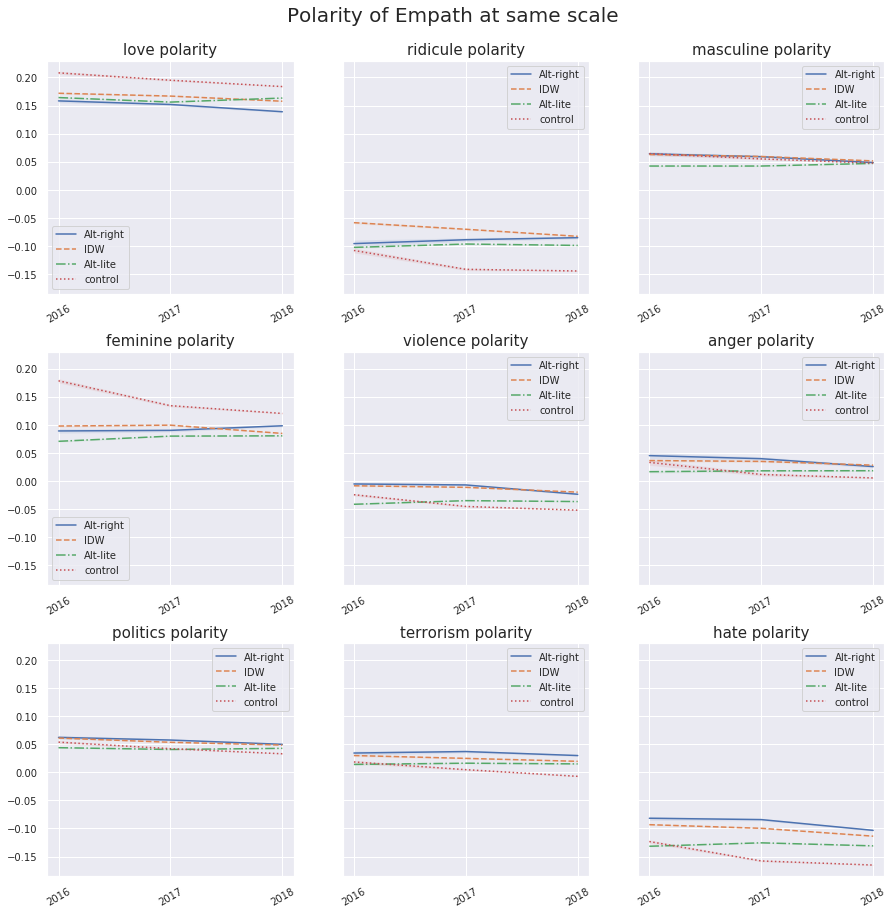

In [70]:
fig, ax = plt.subplots(3, 3, figsize=[15, 15],  squeeze=False, sharey=True)
c=0
plt.suptitle("Polarity of Empath at same scale", fontsize=20, y=.93)
plt.subplots_adjust(hspace=0.25)

for emotion in emotion_list:
    ax[c//3, c%3].set_title(f'{emotion} polarity', fontsize=15)
    for i in range(len(names)):
        ax[c//3, c%3].plot(y[i]["year"][2:], y[i][emotion][2:], lines[i])
        ax[c//3, c%3].fill_between(y[i]["year"][2:], y[i][f"{emotion}_dyd"][2:],
                                   y[i][f"{emotion}_dyu"][2:], alpha=0.1)    
    ax[c//3, c%3].legend(names, fontsize=10)
    ax[c//3, c%3].tick_params(axis='both', labelsize=10)
    ax[c//3, c%3].tick_params(axis='x', rotation=30)

    c+=1
    
plt.savefig(f"{img_path}empath_blob/time/polarity_empath_sharey.png")

# Perspective

In [23]:
attributes = ['TOXICITY', 'SEVERE_TOXICITY', 'IDENTITY_ATTACK']
persp_df_path = df_path + "perspective_df/"
perspective = []
for name in names:
    perspective.append(pd.read_csv(f"{persp_df_path}{name}_perspective_new.csv"))

### Mean

In [8]:
perspective[0]

Unnamed: 0  TOXICITY  TOXICITY_dyu  TOXICITY_dyd  SEVERE_TOXICITY  \
0           0  0.379134      0.380919      0.377222         0.254084   
1           1  0.403585      0.404547      0.402525         0.275266   
2           2  0.405803      0.406460      0.405186         0.274303   

   SEVERE_TOXICITY_dyu  SEVERE_TOXICITY_dyd  IDENTITY_ATTACK  \
0             0.254084             0.254084         0.335646   
1             0.275266             0.275266         0.374330   
2             0.274303             0.274303         0.382113   

   IDENTITY_ATTACK_dyu  IDENTITY_ATTACK_dyd  ...    THREAT  THREAT_dyu  \
0             0.337313             0.333911  ...  0.263700    0.264942   
1             0.375287             0.373411  ...  0.277606    0.278314   
2             0.382754             0.381525  ...  0.284616    0.285059   

   THREAT_dyd  SEXUALLY_EXPLICIT  SEXUALLY_EXPLICIT_dyu  \
0    0.262447           0.208980               0.208980   
1    0.276913           0.211791               0.211791   
2    0.284165           0.206990               0.206990   

   SEXUALLY_EXPLICIT_dyd  FLIRTATION  FLIRTATION_dyu  FLIRTATION_dyd  year  
0               0.208980    0.360441        0.360441        0.360441  2016  
1               0.211791    0.361464        0.361464        0.361464  2017  
2               0.206990    0.357465        0.357465        0.357465  2018  

[3 rows x 26 columns]

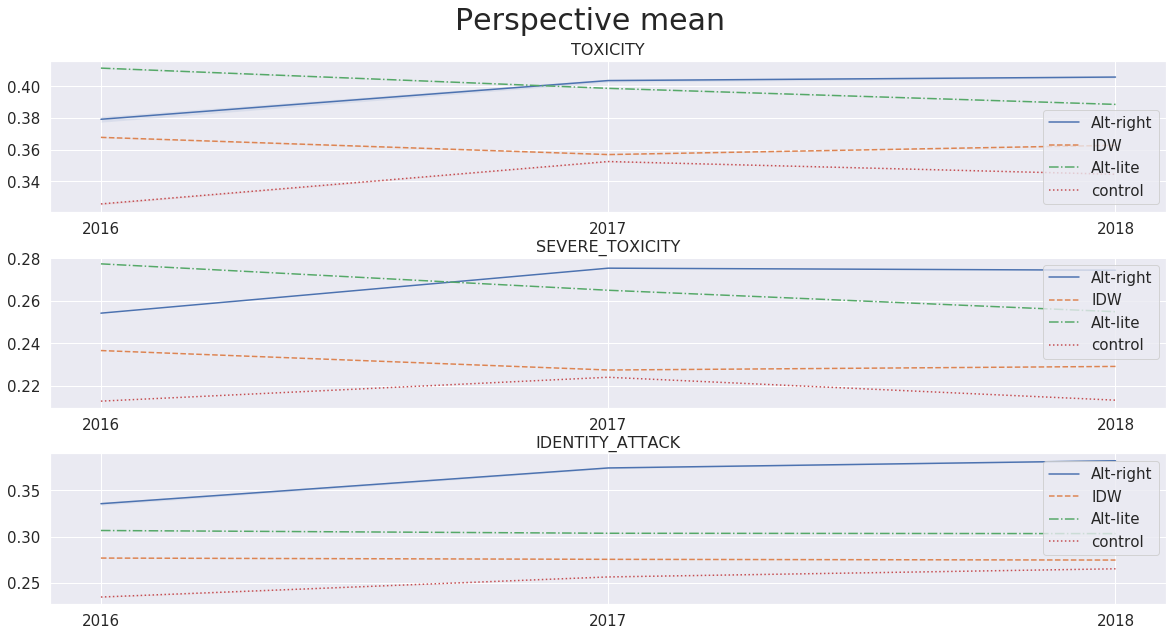

In [25]:
fig, ax = plt.subplots(3, 1, figsize=[20, 10],  squeeze=False)
c=0
plt.subplots_adjust(hspace=0.3)
plt.suptitle("Perspective mean", fontsize=30, y=0.955)
for emotion in attributes:
    #ax[c//1, c%1].set_ylim([0.23,0.43])
    ax[c//1, c%1].set_title(emotion, fontsize=16)
    for i in range(len(names)):
        ax[c//1, c%1].plot(x_label, perspective[i][emotion], lines[i])
        ax[c//1, c%1].fill_between(x_label, perspective[i][f"{emotion}_dyd"],
                                   perspective[i][f"{emotion}_dyu"], alpha=0.1)
    ax[c//1, c%1].legend(names, prop={'size': 15})
    ax[c//1, c%1].tick_params(axis='both', labelsize=15)

    c+=1
plt.savefig(f"{img_path}perspective/time/perspective_mean.png")    

### Perspective with Empath

In [34]:
def plot_persp_empath(attr):
    y = []
    names = ["Alt-right", "IDW", "Alt-lite", "control"]
    for name in names:
        y.append(pd.read_csv(f"./empath_perspective/{name}_{attr}_empath.csv"))
        
    fig, ax = plt.subplots(7, 3, figsize=[20, 50],  squeeze=False, sharey=True)
    c=0
    plt.suptitle(f"{attr} of Empath", fontsize=20, y=.9)

    for emotion in emotion_list[1:]:
        ax[c//3, c%3].set_title(f'{emotion} {attr} mean', fontsize=16)
        for i in range(len(names)):
            ax[c//3, c%3].plot(y[i]["year"][3:], y[i][emotion][3:], lines[i])
            ax[c//3, c%3].fill_between(y[i]["year"][3:], y[i][f"{emotion}_dyd"][3:],
                                       y[i][f"{emotion}_dyu"][3:], alpha=0.1)    
        ax[c//3, c%3].legend(names)
        c+=1
    #plt.savefig(f"{imgs_path}empath_perspective/{attr}_Empath.png", bbox_inches = 'tight')
    plt.show()
    plt.close()

In [60]:
lines = ['-', '--', '-.', ':',  '-.', ':','--', '-']
attributes_reduced = ['TOXICITY', 'SEVERE_TOXICITY', 'IDENTITY_ATTACK', 'INSULT', 'THREAT']
emp_persp_df_path = df_path + "empath_perspective_df/time/"

In [ ]:
names = ["Alt-right", "IDW", "Alt-lite", "control"]
for name in names:
    y = []
    for attr in attributes_reduced:
        y.append(pd.read_csv(f"{emp_persp_df_path}{name}_{attr}_empath.csv"))

    fig, ax = plt.subplots(7, 3, figsize=[20, 50],  squeeze=False, sharey=True)
    c=0
    plt.suptitle(f"{name} Empath + Perspective", fontsize=20, y=.9)
    for emotion in emotion_list[1:]:
        ax[c//3, c%3].set_ylim([0.18, 0.7])
        ax[c//3, c%3].set_title(f'{name} {emotion}', fontsize=16)
        for i in range(len(attributes_reduced)):
            ax[c//3, c%3].plot(y[i]["year"][3:], y[i][emotion][3:], lines[i])
            ax[c//3, c%3].fill_between(y[i]["year"][3:], y[i][f"{emotion}_dyd"][3:],
                                       y[i][f"{emotion}_dyu"][3:], alpha=0.1)    
        ax[c//3, c%3].legend(attributes_reduced)
        
        c+=1
    #plt.savefig(f"{imgs_path}empath_perspective/{name}_Empath_Perspective.png", bbox_inches = 'tight')
    plt.show()
    plt.close()

# Pearson Coeficient

### Pearson Perspective Matrix

In [76]:
matrixes = []
for name in names:
    df = pd.read_csv(f"{persp_df_path}{name}_perspective.csv")
    df = df[attributes]
    arr = df.values

    z = np.zeros([10, 8])
    matrix = np.corrcoef(arr.T)
    for i in range(8):
        for j in range(8):
            z[i+1][j] = matrix[i][j]
            
    matrixes.append(z)

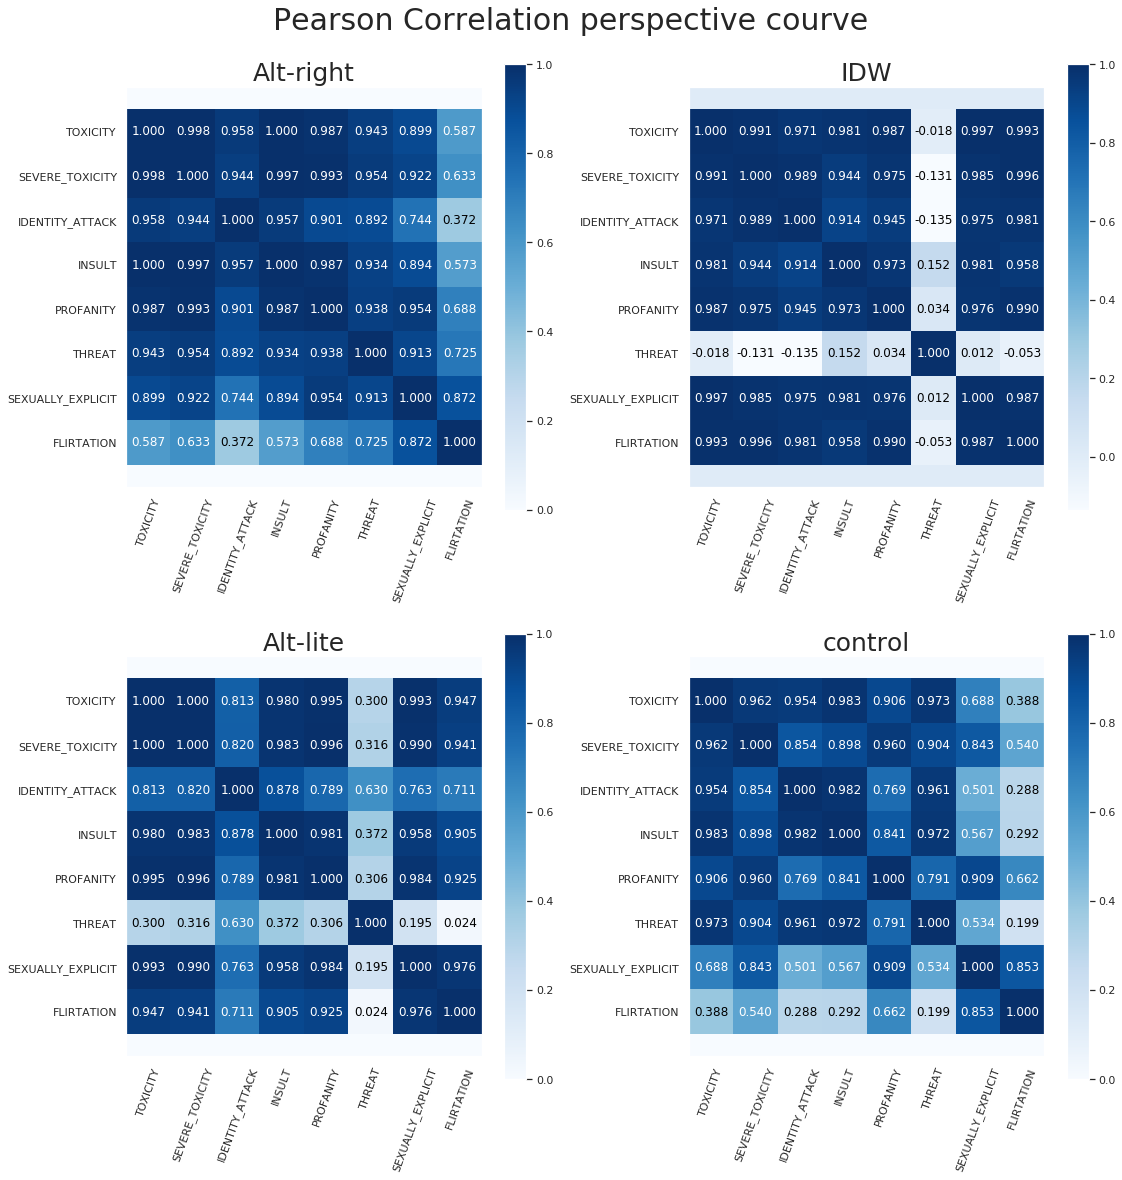

In [79]:
size=8
nr_rows = 2
nr_cols = 2  
prop = 1

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*size, nr_rows*size), squeeze=False)

plt.suptitle("Pearson Correlation perspective courve", y=1.03, fontsize=30*prop)

for r in range(0,nr_rows):
    for c in range(0, nr_cols): 
        col = r*nr_cols+c

        if col < len(matrixes):
            
            matrix = matrixes[col]
            cmap=plt.cm.Blues
            axs[r][c].grid(False)
            axs[r][c].tick_params(axis='x', rotation=70)
            axs[r][c].tick_params(axis='y')
            axs[r][c].set_title(names[col], fontsize=25)
            
            im = axs[r][c].imshow(matrix, interpolation='nearest', cmap=cmap)
            axs[r][c].figure.colorbar(im, ax=axs[r][c])

            # We want to show all ticks...
            axs[r][c].set(xticks=np.arange(matrix.shape[1]),
                   yticks=np.arange(matrix.shape[0]),
                   # ... and label them with the respective list entries,
                   xticklabels=attributes, yticklabels=[""] + attributes)
            # Loop over data dimensions and create text annotations.
            fmt = '.3f'
            thresh = matrix.max() / 2.
            for i in range(matrix.shape[0]):
                for j in range(matrix.shape[1]):
                    if i==0 or i==len(attributes)+1: continue
                    axs[r][c].text(j, i, format(matrix[i, j], fmt),
                            ha="center", va="center",
                            color="white" if matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.savefig(f'{img_path}pearson_correlation/time/pearson_correlation_perspective_matrix_square.png', bbox_inches = 'tight')
plt.show()

### Pearson Empath Matrix

In [40]:
def plot_pearson_matrix(matrix, title, size, xticklabels, yticklabels):
    nr_rows = 1
    nr_cols = 1  
    prop = size/18

    fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*size,nr_rows*size-2), squeeze=False)

    plt.suptitle(title, y=1.01, fontsize=25*prop)
    plt.xticks(rotation=70, fontsize=15*prop)
    plt.yticks(rotation=0, fontsize=15*prop)

    for r in range(0,nr_rows):
        for c in range(0, nr_cols): 
            col = r*nr_cols+c

            if col < len(matrix):

                matrix = matrix
                cmap=plt.cm.Blues

                axs[r][c].grid(False)
                im = axs[r][c].imshow(matrix, interpolation='nearest', cmap=cmap)
                axs[r][c].figure.colorbar(im, ax=axs[r][c])

                # We want to show all ticks...
                axs[r][c].set(xticks=np.arange(matrix.shape[1]),
                       yticks=np.arange(matrix.shape[0]),
                       # ... and label them with the respective list entries
                       xticklabels=xticklabels, yticklabels=[""] + yticklabels)
                # Loop over data dimensions and create text annotations.
                fmt = '.3f'
                thresh = matrix.max() / 2.
                for i in range(matrix.shape[0]):
                    for j in range(matrix.shape[1]):
                        if i==0 or i==len(xticklabels)+1: continue
                        axs[r][c].text(j, i, format(matrix[i, j], fmt),
                                ha="center", va="center",
                                color="white" if matrix[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.savefig(f'{imgs_path}pearson_correlation/{title}.png', bbox_inches = 'tight')
    plt.show()
    plt.close()

In [44]:
def df_to_plot_empath(name, ticks=emotion_list):
    df = pd.read_csv(f"{empath_df_path}{name}.csv")
    arr = df.values

    arr = np.delete(arr, 0, 1)
    arr = np.delete(arr, 1, 1)
    arr = np.delete(arr, 21, 1)
    arr = np.delete(arr, 0, 0)
    arr = np.delete(arr, 1, 0)
    arr = np.delete(arr, 2, 0)

    z = np.zeros([23, 21])
    matrix = np.corrcoef(arr.T)
    for i in range(21):
        for j in range(21):
            z[i+1][j] = matrix[i][j]

    plot_pearson_matrix(z, title=f"Pearson correlation from {name} empath courve", size=20,
                        xticklabels=ticks, yticklabels=ticks)

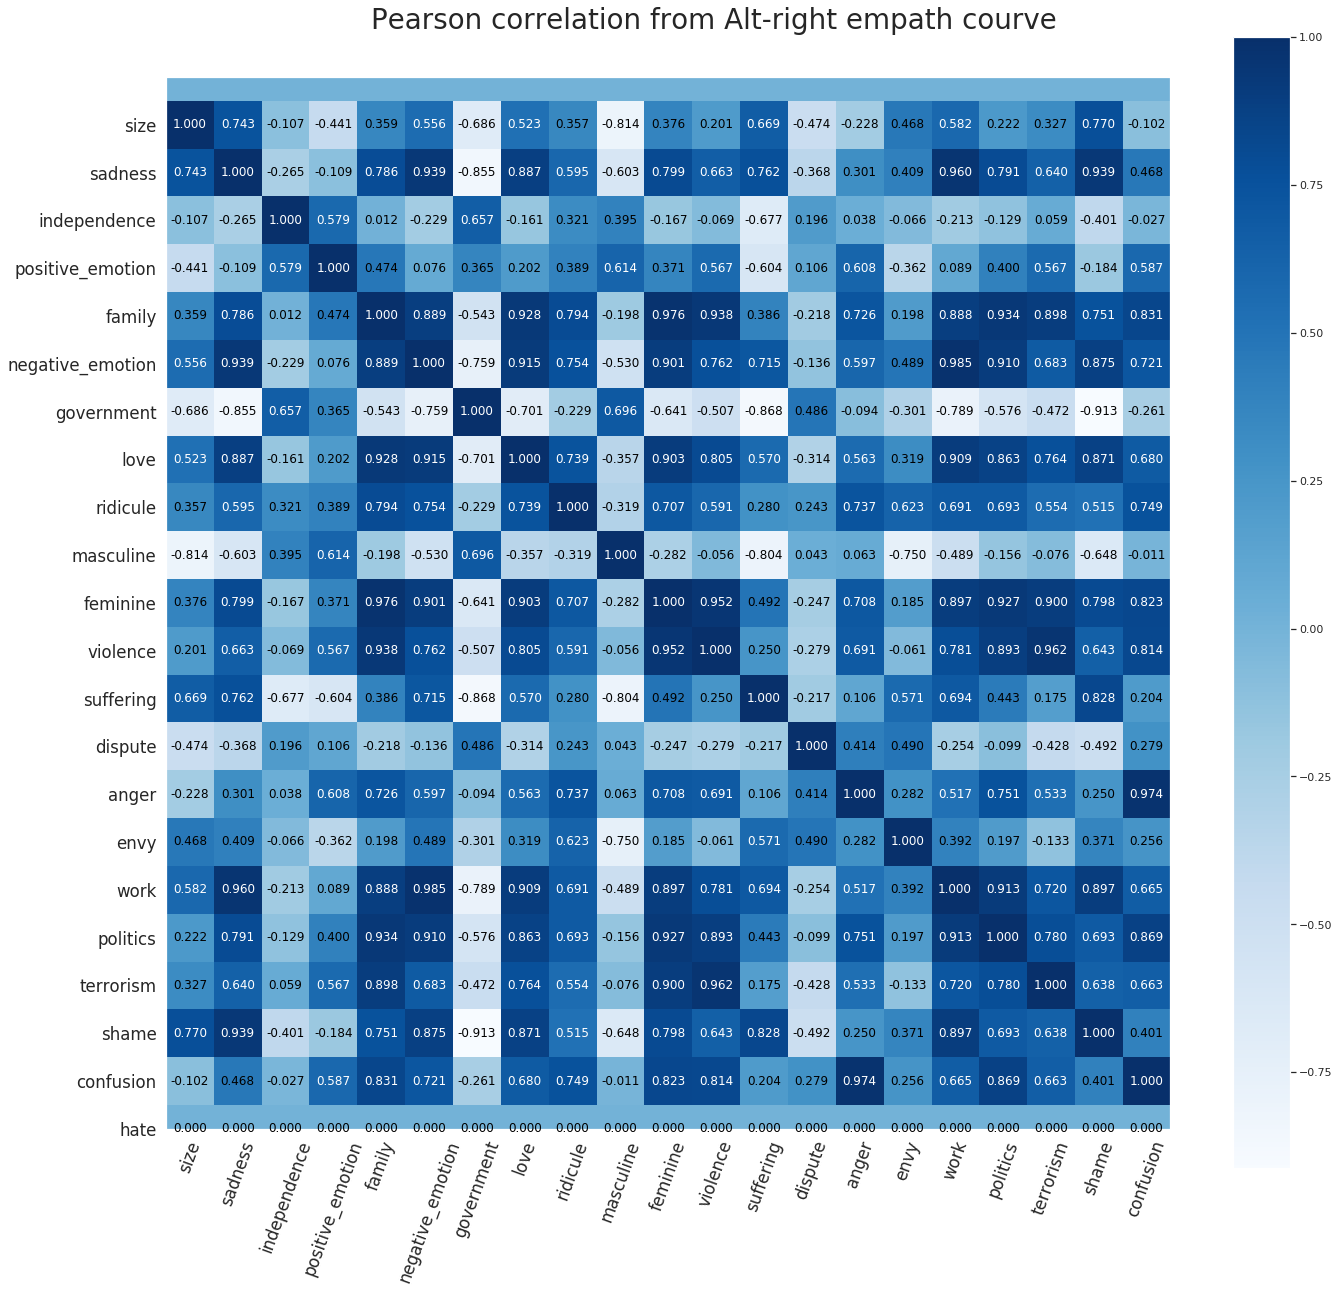

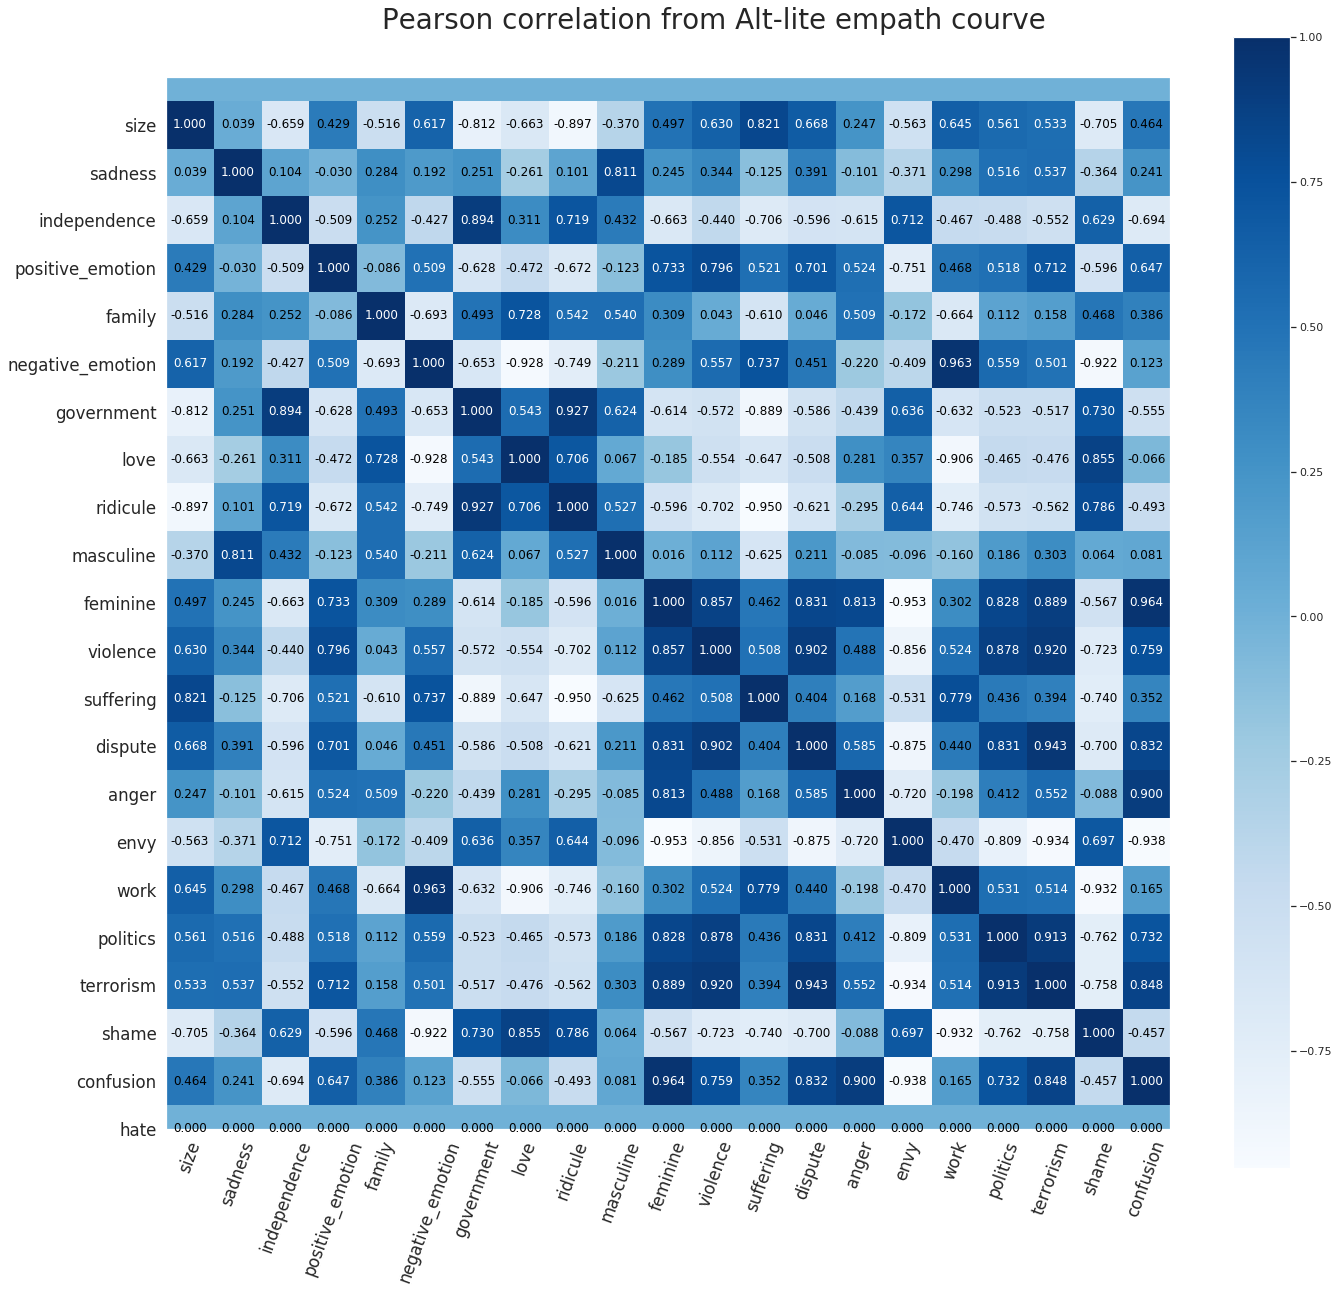

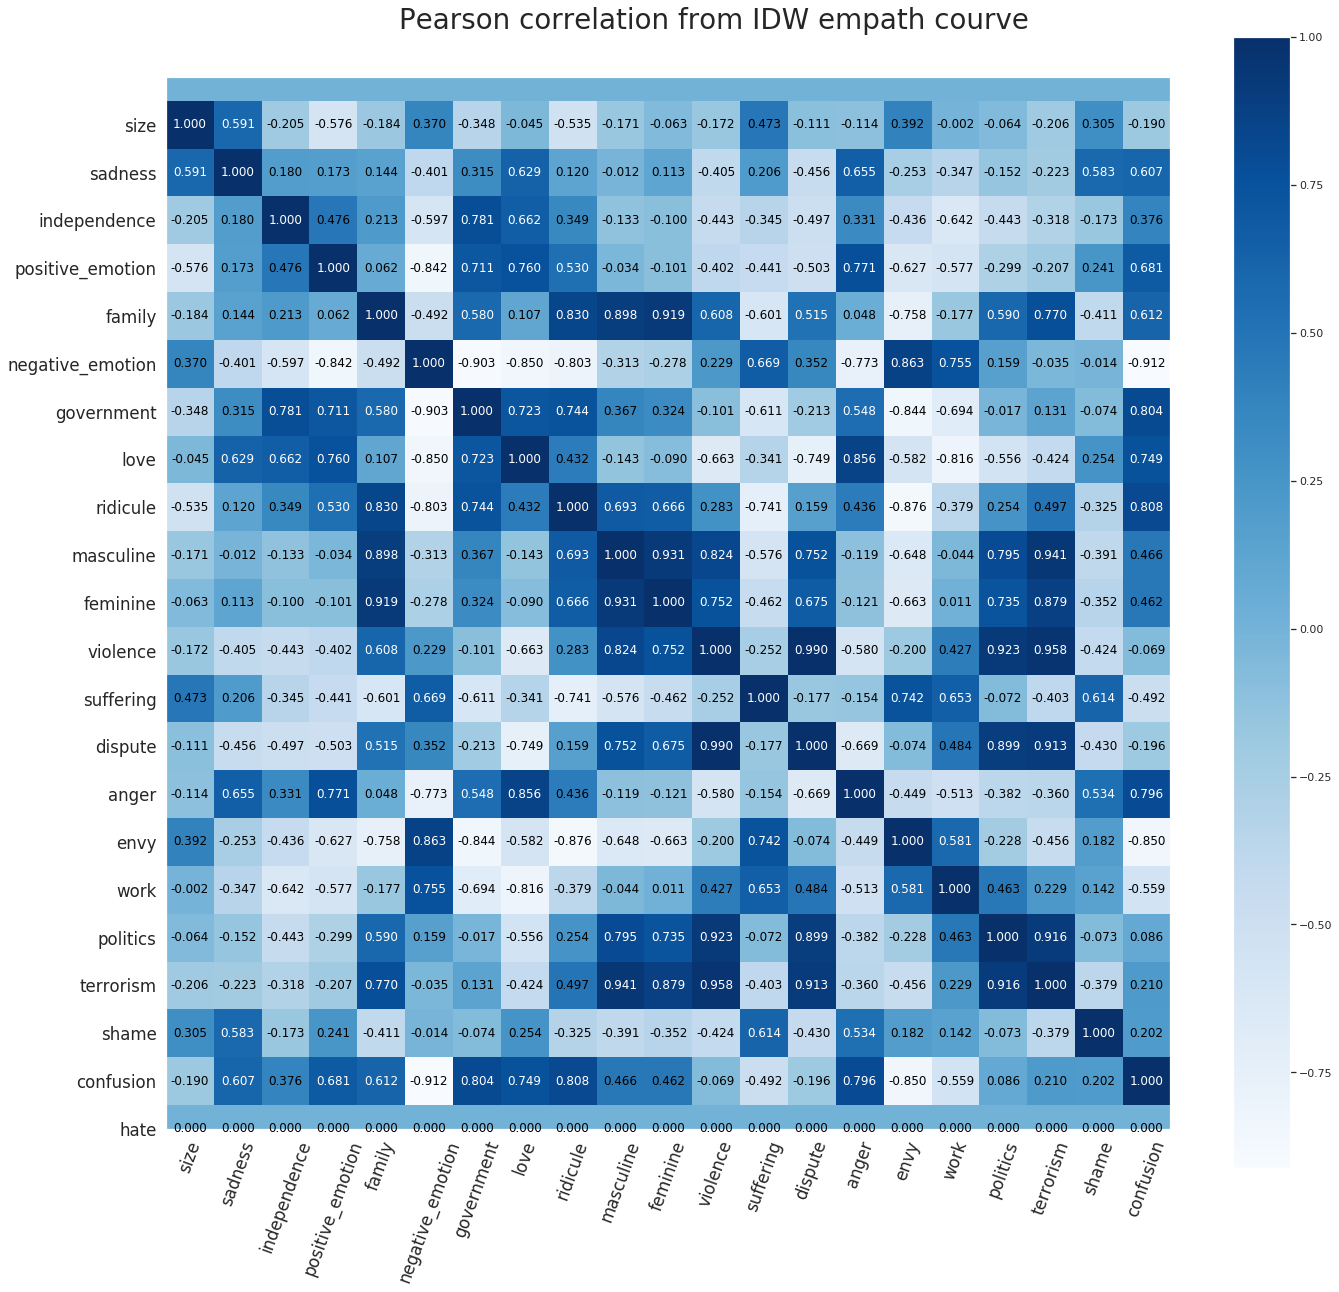

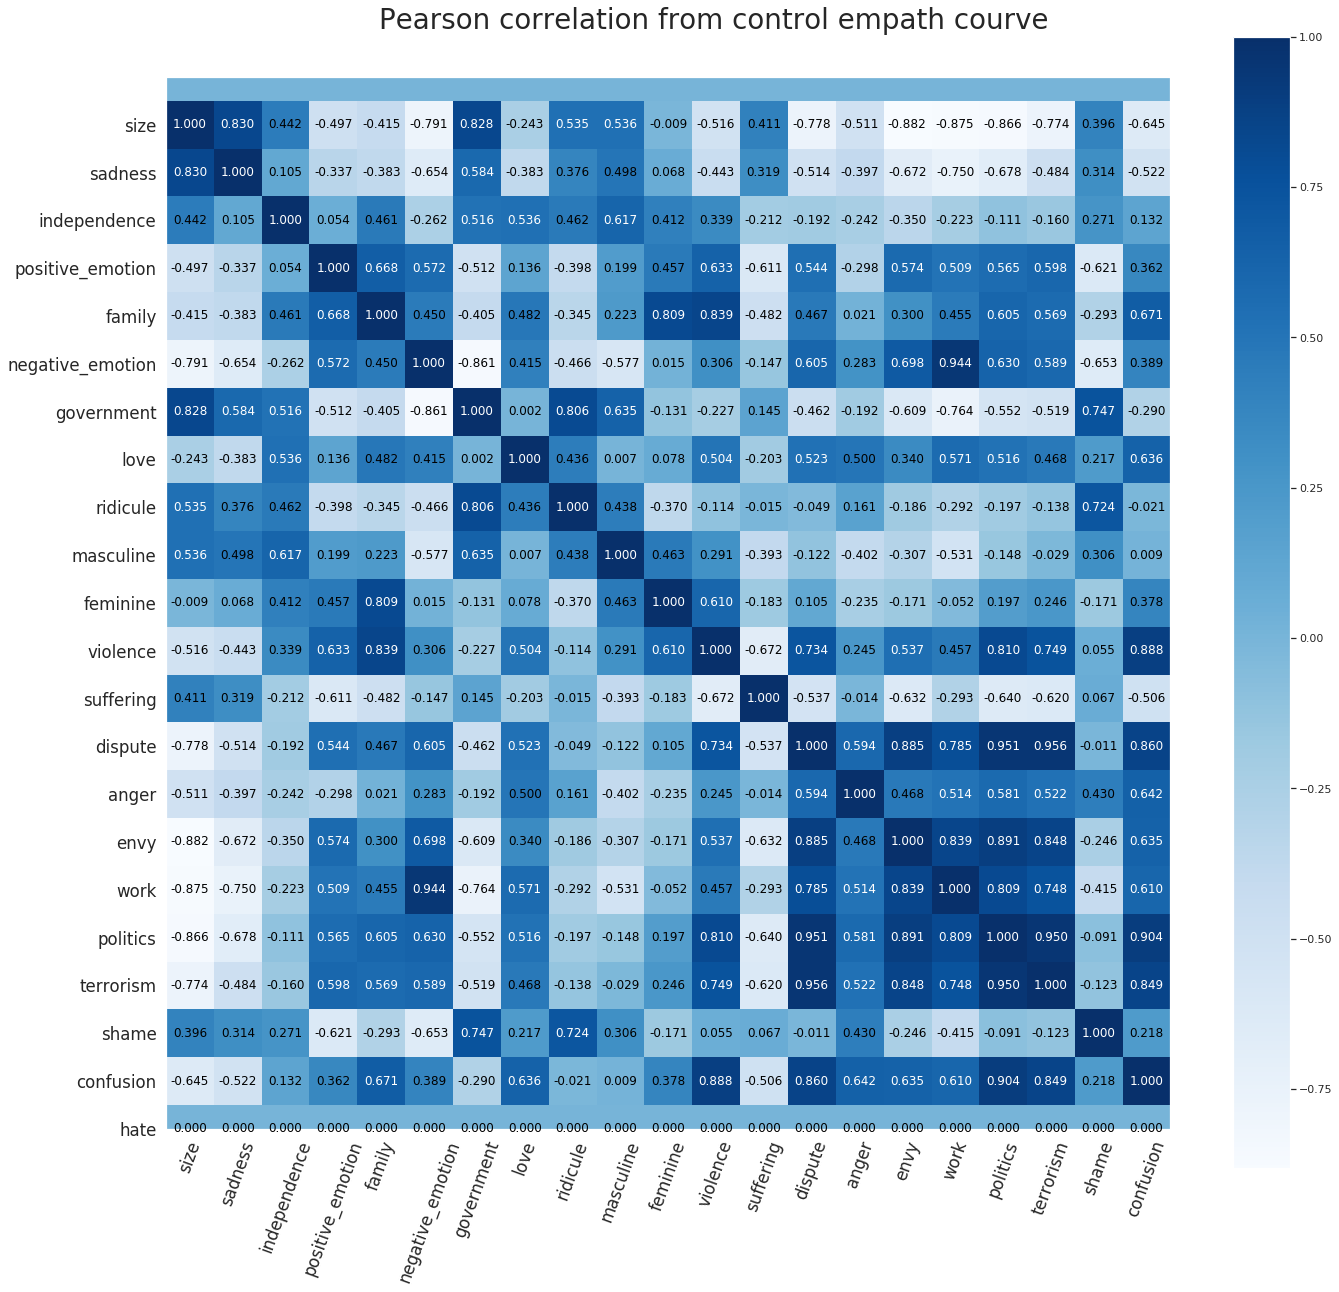

In [45]:
df_to_plot_empath("Alt-right")
df_to_plot_empath("Alt-lite")
df_to_plot_empath("IDW")
df_to_plot_empath("control")

### Pearson Perspective Graph

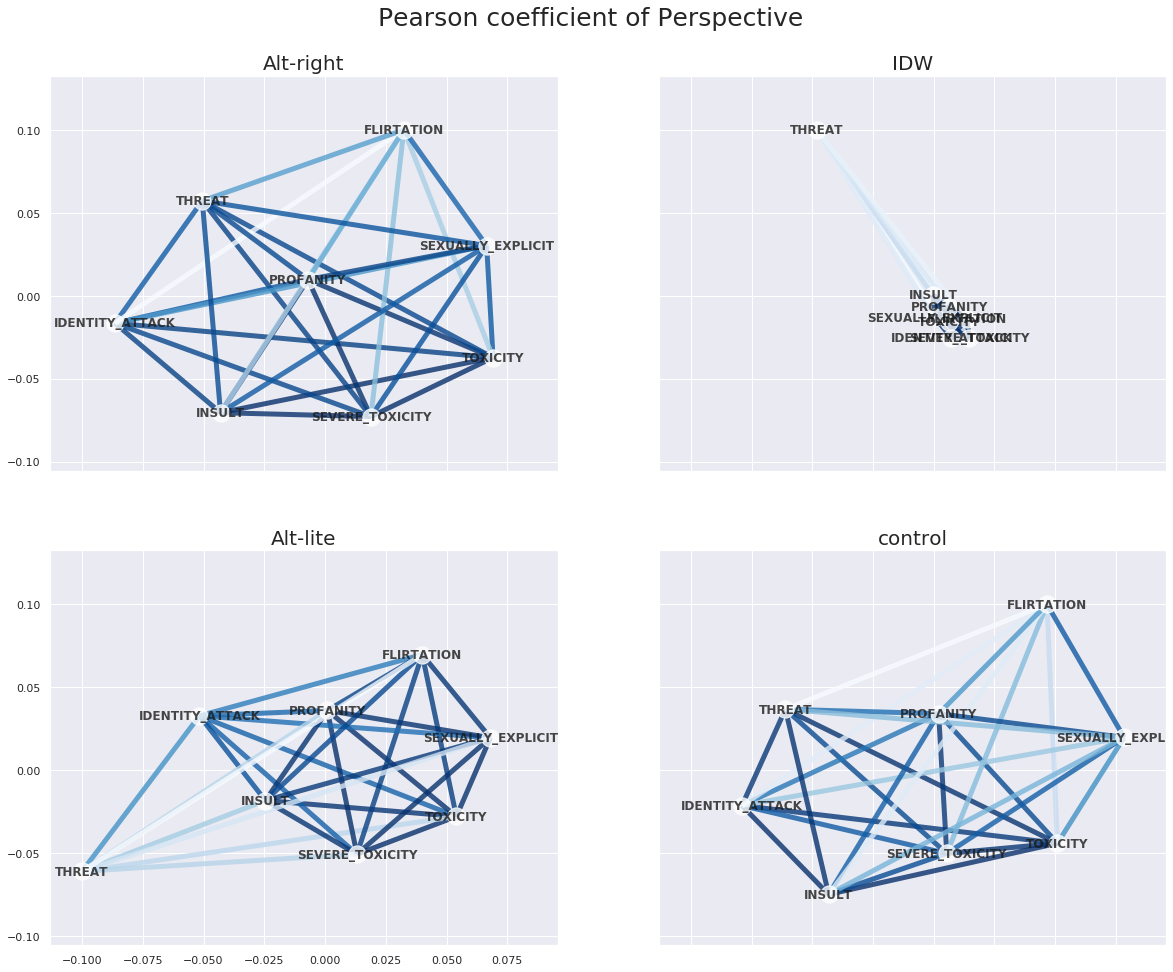

In [82]:
Graphs = []
nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*10,nr_rows*8), squeeze=False, sharex=True, sharey=True)
fig.suptitle('Pearson coefficient of Perspective', fontsize=25, y=0.94)

for r in range(0, nr_rows):
    for c in range(0, nr_cols): 
        col = r*nr_cols+c
        Gr = nx.Graph()
        
        df = pd.read_csv(f"{persp_df_path}{names[col]}_perspective.csv")
        df = df[attributes]
        arr = df.values
        corref= np.corrcoef(arr.T)
        
        for rr in range(8):
            for cc in range(8):
                if rr==cc: continue
                Gr.add_weighted_edges_from([[attributes[rr], attributes[cc], corref[rr][cc]]])

        no_degree = []
        size = []
        
        for node in Gr.nodes:
            if Gr.degree(node, weight='weight') == 0:
                no_degree.append(node)
            else:
                size.append(Gr.degree(node, weight='weight'))
    
        Gr.remove_nodes_from(no_degree)
        
        axs[r, c].set_title(names[col], fontsize=20)
        
        size = [Gr.edges[i]['weight'] for i in Gr.edges]
        nx.draw_networkx(Gr, pos=nx.spring_layout(Gr, seed=6, scale=0.1), with_labels=True, alpha=0.8,
                         edge_color=np.array(size), width=5, ax=axs[r, c],
                         edge_cmap=plt.cm.Blues, node_color='w',font_weight="bold")
plt.savefig(f"{img_path}pearson_correlation/time/pearson_correlation_perspective_graph.png",bbox_inches = 'tight')

### Pearson Empath Graph

In [ ]:
Graphs = []
nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*10,nr_rows*8), squeeze=False, sharex=True, sharey=True)
fig.suptitle('Pearson coefficient of Empath', fontsize=25, y=0.94)

for r in range(0, nr_rows):
    for c in range(0, nr_cols): 
        col = r*nr_cols+c
        Gr = nx.Graph()
        
        df = pd.read_csv(f"{empath_df_path}{names[col]}.csv")
        arr = df.values
        arr = np.delete(arr, 0, 1)
        arr = np.delete(arr, 1, 1)
        arr = np.delete(arr, 21, 1)
        arr = np.delete(arr, 0, 0)
        arr = np.delete(arr, 1, 0)
        arr = np.delete(arr, 2, 0)
        corref= np.corrcoef(arr.T)
        
        for rr in range(21):
            for cc in range(21):
                if rr==cc: continue
                Gr.add_weighted_edges_from([[emotion_list[rr], emotion_list[cc], corref[rr][cc]]])

        no_degree = []
        size = []
        
        for node in Gr.nodes:
            if Gr.degree(node, weight='weight') == 0:
                no_degree.append(node)
            else:
                size.append(Gr.degree(node, weight='weight'))
    
        Gr.remove_nodes_from(no_degree)
        
        axs[r, c].set_title(names[col], fontsize=20)
        
        size = [Gr.edges[i]['weight'] for i in Gr.edges]
        nx.draw_networkx(Gr, pos=nx.spring_layout(Gr, seed=6, scale=0.1), with_labels=True, alpha=0.8,
                         edge_color=np.array(size), width=5, ax=axs[r, c],
                         edge_cmap=plt.cm.Blues, node_color='w',font_weight="bold")
#plt.savefig("{imgs_path}pearson_correlation/pearson_correlation_empath_graph.png", bbox_inches = 'tight')